In [1]:
import sympy as sp 
sp.init_printing()

%matplotlib inline

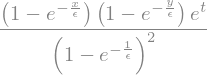

In [2]:
sp.var('x y z t')
epsilon = sp.symbols('\epsilon')
# c = sp.exp(-t) * sp.sin(sp.pi * x/2)*sp.sin(sp.pi * y/2) * ( 1 - sp.exp((x-1)/epsilon) )* ( 1 - sp.exp((-1)/epsilon) )
c = sp.exp(t)/(1-sp.exp(-1/epsilon))**2 * ( 1-sp.exp(-x/epsilon) ) * ( 1-sp.exp(-y/epsilon) )    #   * ( 1-sp.exp(-z/epsilon) )/(1-sp.exp(-1/epsilon))
# c = sp.exp( -t ) * sp.sin( x * sp.sin(sp.pi/4) + y * sp.sin(sp.pi/4) )

dcx = sp.diff(c,x)
dcy = sp.diff(c,y)
# dcz = sp.diff(c,z)

laplacian = sp.diff(dcx,x) + sp.diff(dcy,y)      #   + sp.diff(dcz,z)
dot_grad  = dcx + dcy      # + dcz

dct = sp.diff(c,t)
c

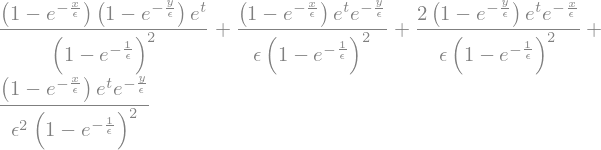

In [28]:
g = dct     +     ( dcx + dcy )     -     ( epsilon * sp.diff(dcx,x) + sp.diff(dcy,y) )
sp.simplify(g)
g

In [29]:
sp.cxxcode( g , standard='C++11')
# sp.cxxcode( laplacian , standard='C++11')
# laplacian

'(1 - std::exp(-x/\\epsilon))*(1 - std::exp(-y/\\epsilon))*std::exp(t)/std::pow(1 - std::exp(-1/\\epsilon), 2) + (1 - std::exp(-x/\\epsilon))*std::exp(t)*std::exp(-y/\\epsilon)/(\\epsilon*std::pow(1 - std::exp(-1/\\epsilon), 2)) + 2*(1 - std::exp(-y/\\epsilon))*std::exp(t)*std::exp(-x/\\epsilon)/(\\epsilon*std::pow(1 - std::exp(-1/\\epsilon), 2)) + (1 - std::exp(-x/\\epsilon))*std::exp(t)*std::exp(-y/\\epsilon)/(std::pow(\\epsilon, 2)*std::pow(1 - std::exp(-1/\\epsilon), 2))'

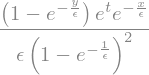

In [6]:
sp.cxxcode(dcy, standard='C++11')
dcx

In [51]:
sp.cxxcode(c, standard='C++11') 

'(1 - std::exp(-x/\\epsilon))*(1 - std::exp(-y/\\epsilon))*std::exp(t)/std::pow(1 - std::exp(-1/\\epsilon), 2)'

In [13]:
sp.cxxcode(epsilon * laplacian, standard='C++11') 

'\\epsilon*(-(1 - std::exp(-x/\\epsilon))*std::exp(t)*std::exp(-y/\\epsilon)/(std::pow(\\epsilon, 2)*std::pow(1 - std::exp(-1/\\epsilon), 2)) - (1 - std::exp(-y/\\epsilon))*std::exp(t)*std::exp(-x/\\epsilon)/(std::pow(\\epsilon, 2)*std::pow(1 - std::exp(-1/\\epsilon), 2)))'

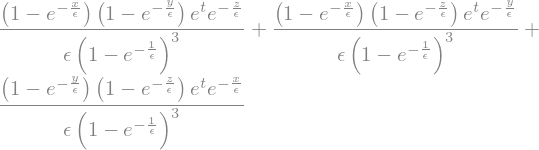

In [43]:
dot_grad

In [24]:
import matplotlib.style
matplotlib.style.use('seaborn') 
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [4]:
from sympy.plotting import plot, plot3d, PlotGrid
t = 0.0
epsilon = 1

# c = sp.exp(-t) * sp.sin(sp.pi * x/2)*sp.sin(sp.pi * y/2) * ( 1 - sp.exp((x-1)/epsilon) )* ( 1 - sp.exp((y-1)/epsilon) ) # Test inserting time in Stationary Boundary
# c = sp.exp(t)/(1-sp.exp(-1/epsilon))**2 * ( 1-sp.exp(-x/epsilon) ) * ( 1-sp.exp(-y/epsilon) )             # Test
# c = sp.exp( -t ) * sp.sin( x * sp.sin(sp.pi/4) + y * sp.sin(sp.pi/4) )                                    # Smooth

c = sp.sin( sp.pi*x/2) * (1 - sp.exp( (x-1)/epsilon ) ) * sp.sin( sp.pi*y/2) * (1 - sp.exp( (y-1)/epsilon ) )     # Boundary Stationary

%matplotlib qt  
sol = plot3d(c, (x, 0, 1), (y, 0, 1))

In [31]:
c

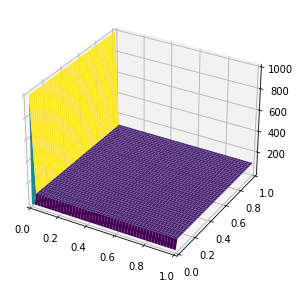

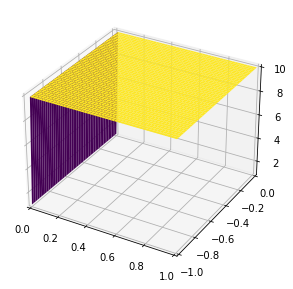

In [4]:
from sympy import Piecewise
K = Piecewise( (1, ((x <= 0) & (y <= 0))), (10, ((x > 0) & (y <= 0)) ), (100, ((x > 0) & (y > 0))), (1000, True) )

from sympy.plotting import plot3d
sol = plot3d(K, (x, 0, 1), (y, 0, 1))
sol = plot3d(K, (x, 0, 1), (y, -1, 0))